In [1]:
#hide
from utils import *
hc(
    "Hidden Markov Model",
    []
)
toc(
    [
        "References",
        "Problem Statement",
    ],
    1
)

## References

1. [1966: Statistical Inference for Probabilistic Functions of Finite State Markov Chains](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-37/issue-6/Statistical-Inference-for-Probabilistic-Functions-of-Finite-State-Markov-Chains/10.1214/aoms/1177699147.full)
3. [1989: A Tutorial on HMM by Rabiner](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=18626)*
4. [2012: Chapter 17 Machine Learning - A Probabilistic Perspective](https://raw.githubusercontent.com/kerasking/book-1/master/ML%20Machine%20Learning-A%20Probabilistic%20Perspective.pdf)
5. [A Revealing Introduction to Hidden Markov Models](https://www.cs.sjsu.edu/~stamp/RUA/HMM.pdf)

## Goal

1. To follow [2] thoroughly.
2. To understand HMM from mathematical perspective.
3. To be able to implement HMM from scratch in Python
4. To be able to use it in a real-world context.

## Discrete Markov Processes

Consider a system that is charaterized at any given time $t \in \{0, 1, 2, \dots \}$ by a state variable $q_t \in \mathbb{S} = \{S_0, S_1, \dots, S_{N-1}\}$.

Assuming that the system's current state depends on its previous states then the probability of the system to be in state $S_j$ at time $t$ is defined as \
$P[q_t = S_j | q_{t-1} = S_i, q_{t-2} = S_k, \dots]$

To simplify the problem, we make a few assumptions:

1. The system's current state $q_t$ only depends on it's immediate previous state $q_{t-1}$. \
$P[q_t = S_j | q_{t-1} = S_i, q_{t-2} = S_k, \dots] = P[q_t = S_j | q_{t-1} = S_i]$
2. The dependency is independent of $t$. \
$P[q_t = S_j | q_{t-1} = S_i] = a_{ij}$ \
where, $a_{ij}$ is independent of $t$ meaning $\frac{da_{ij}}{dt} = 0$
3. The system has to be in one of the states $\mathbb{S}$. \
$a_{ij} \ge 0$ and $\sum_{j=0}^{N-1}a_{ij} = 1$

JARGON \
${a_{ij}}$ is the probability of $S_i \rightarrow S_j$ transition and is often referred to as *State Transition Probabilites* \
The system that follows the above assumptions are called *N-state Observable Markov Models (N-state OMMs)*. The reason for calling it as *observable* is due to the states i.e. elements $\in \mathbb{S}$ being physical observables.

## Example


Suppose the weather for a day can be characterized into one the three states. Hence the system can be modelled with a *3-State Observable Markov Model*.
- State 0 ($S_0$): rain/snow
- State 1 ($S_1$): cloudy
- State 2 ($S_2$): sunny

with the following state transition probabilites written in matrix form

$A = {a_{ij}} = \begin{bmatrix} 0.4 & 0.3 & 0.3 \\ 0.2 & 0.6 & 0.2 \\ 0.1 & 0.1 & 0.8 \end{bmatrix}$

We also define $\pi_{i}$ which is the probability of initialising the system with state $i$,

$\pi_{i} = P(q_1 = S_i), \quad 0 \le i \le 2$

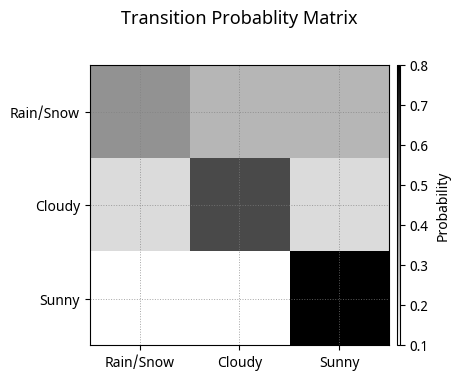

In [5]:
#hide
import numpy as np
import modusa as ms

A = np.array([[0.4, 0.3, 0.3], [0.2, 0.6, 0.2], [0.1, 0.1, 0.8]])
fig = ms.fig("m", width=4)
fig.add_matrix(A, label="Probability", 
               yticks=[0, 1, 2], yticklabels=["Rain/Snow", "Cloudy", "Sunny"], 
               xticks=[0, 1, 2], xticklabels=["Rain/Snow", "Cloudy", "Sunny"],
              )
fig.add_title("Transition Probablity Matrix")

For any OMMs, we are interested in the following queries:
- The probability of observing a given sequence of states.
- Given the model is in state $S_i$, the probability of the model to stays in the same state $S_i$ for next $d$ duration.

The probability of getting a given sequence of observations $O$ say, $O = \{S_2, S_2, S_2, S_0, S_0, S_2, S_1, S_2\}$ corresponding to $t = \{0, 1, 2, ..., 7\}$ is given by:

$P(O|\text{Model}) = P(S_2, S_2, S_2, S_0, S_0, S_2, S_1, S_2|\text{Model})$

$= P(S_2) \times P(S_2 | S_2) \times P(S_2 | S_2) \times P(S_0 | S_2) \times P(S_0 | S_0) \times P(S_2 | S_0) \times P(S_1 | S_2) \times P(S_2 | S_1)$

$= \pi_{2} \times a_{22} \times a_{22} \times a_{20} \times a_{00} \times a_{02} \times a_{21} \times a_{12}$


In [6]:
def compute_prob_obsv(O, A, pi):
    """
    Compute probability of occurence of
    a series of observations O given the
    OMM characterized by A.

    Parameters
    ----------
    O: list[index]
        - Observation sequences i.e. sequence of states to find the probability of.
    A: ndarray
        - Transition probabilities.
    pi: ndarray
        - Initial probabilities.
    """
    curr_state = O[0]
    P = pi[curr_state] # Initial probability
    for i in range(1, len(O)):
        prev_state = O[i-1]
        curr_state = O[i]
        P *= A[prev_state, curr_state]

    return P

P = compute_prob_obsv([2, 2, 2, 0, 0, 2, 1, 2], A, pi=[1, 1, 1])
print(f"{P:.3e}")

1.536e-04


The probability of the system staying in the same state for $d$ duration is given by:

$P(O|\text{Model})$ where, $O = \{S_i, S_i, ..., S_i, S_j \ne S_i \}$ for $t = \{0, 1, ..., d-1, d \}$

$P(O|\text{Model}, q_0 = S_i) = (a_{ii})^{d-1} \times (1 - a_{ii}) = p_i(d)$

JARGON \
$p_i(d)$ is known as (discrete) probability density function (PDF) of duration $d$ in state $i$

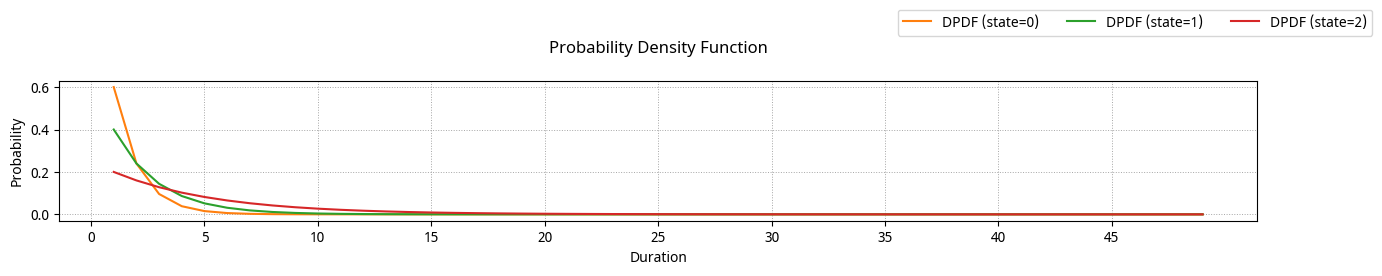

In [48]:
def compute_maintain_state_prob(s0, d, A):
    """
    Compute the probability of the system
    to stay in the same state for d duration
    with start state included.

    s0: int
        - Starting state of the system that needs to be retained for next d duration.
    d: int
        - For how many duration (>0), the state should be unchanged from s0.
    A: ndarray
        - Transition probability of the system.

    Returns
    -------
    float
        - Computed probability.
    """
    
    aii = A[s0, s0]

    if d <= 0:
        raise ValueError("d must be greater than 0")

    return (aii ** (d - 1)) * (1 - aii)

D = 50 # Total duration for the state to remain unchanged
dpdf0 = np.zeros(D-1)
dpdf1 = np.zeros(D-1)
dpdf2 = np.zeros(D-1)
ds = np.zeros(D-1)

for d in range(1, 50):
    dpdf0[d-1] = compute_maintain_state_prob(0, d, A)
    dpdf1[d-1] = compute_maintain_state_prob(1, d, A)
    dpdf2[d-1] = compute_maintain_state_prob(2, d, A)
    ds[d-1] = d

fig = ms.fig("s")
fig.add_signal(dpdf0, ds, label=f"DPDF (state={0})", ylabel="Probability", ax=1, xticks=np.arange(0, 50, 5))
fig.add_signal(dpdf1, ds, label=f"DPDF (state={1})", ylabel="Probability", ax=1)
fig.add_signal(dpdf2, ds, label=f"DPDF (state={2})", ylabel="Probability", ax=1)
fig.add_title("Probability Density Function", s=12)
fig.add_xlabel("Duration")
fig.add_legend(1.2)

To find the expected number of observations (duration) in a state us given by:

$\bar d_{i} = \sum_{d=1}^{\infty} d p_i(d)$

$ = \sum_{d=1}^{\infty} d (a_{ii})^{d-1} \times (1 - a_{ii})$

$ = (1 - a_{ii}) \sum_{d=1}^{\infty} d (a_{ii})^{d-1}$

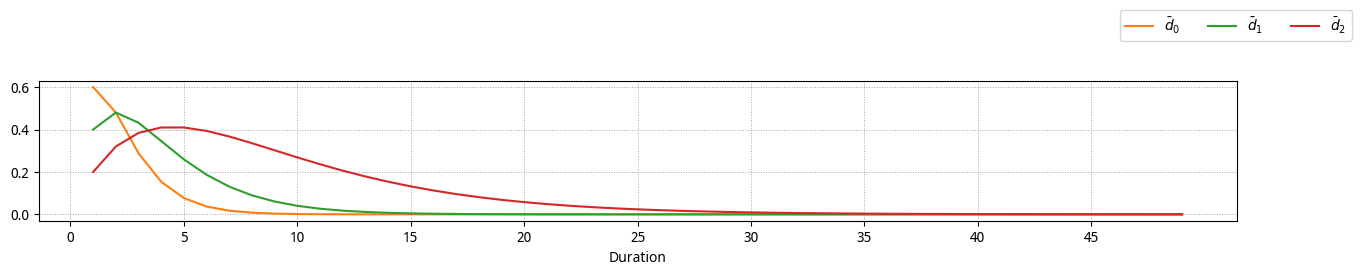

In [56]:
#hide
fig = ms.fig("s")
fig.add_signal(ds*dpdf0, ds, label=f"$\\bar d_{0}$", ax=1, xticks=np.arange(0, 50, 5))
fig.add_signal(ds*dpdf1, ds, label=f"$\\bar d_{1}$", ax=1)
fig.add_signal(ds*dpdf2, ds, label=f"$\\bar d_{2}$", ax=1)

fig.add_xlabel("Duration")
fig.add_legend(1.2)

In [46]:
np.sum((ds**2)*(dpdf2))

np.float64(44.94762000967771)

In [12]:
np.sum(dpdf2)

np.float64(0.9999821594038412)

In [66]:
np.sum(dpdf0 * ds)

np.float64(1.6666666666666665)

In [67]:
np.sum(dpdf1 * ds)

np.float64(2.4999999993062247)

In [68]:
np.sum(dpdf2 * ds)

np.float64(4.999036607807425)